<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python/blob/main/08_preprocessing_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data=pd.Series([1,np.nan,'hello',None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data.isnull().sum()

2

In [ ]:
data[data.notnull()] #booleanindexing

0        1
2    hello
dtype: object

In [ ]:
data=data.dropna()
data

0        1
2    hello
dtype: object

Series에만 적용되는 명령어
* map
* value_counts
* augmin
* augmax
* astype
* isin(포함여부 확인)

In [ ]:
df=pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.dropna(axis='columns') #axis=0과 같은 의미, 열 삭제는 주의해야함(변수가 사라지니까)

,2
0,2
1,5
2,6


In [ ]:
df.dropna(axis='columns',how='all') #전체가 na인 값만 삭제 #없어서 삭제 안됨

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.fillna(0) #na를 0으로 채움

,0,1,2
0,1.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


In [ ]:
df.fillna(method='ffill') #행 기준 #[0][1]의 값이 [0][2]에 채워짐

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [ ]:
df.fillna(method='bfill') #행 기준 #[1][1]의 값이 [1][0]에 채워짐

,0,1,2
0,1.0,3.0,2
1,2.0,3.0,5
2,NaN,4.0,6


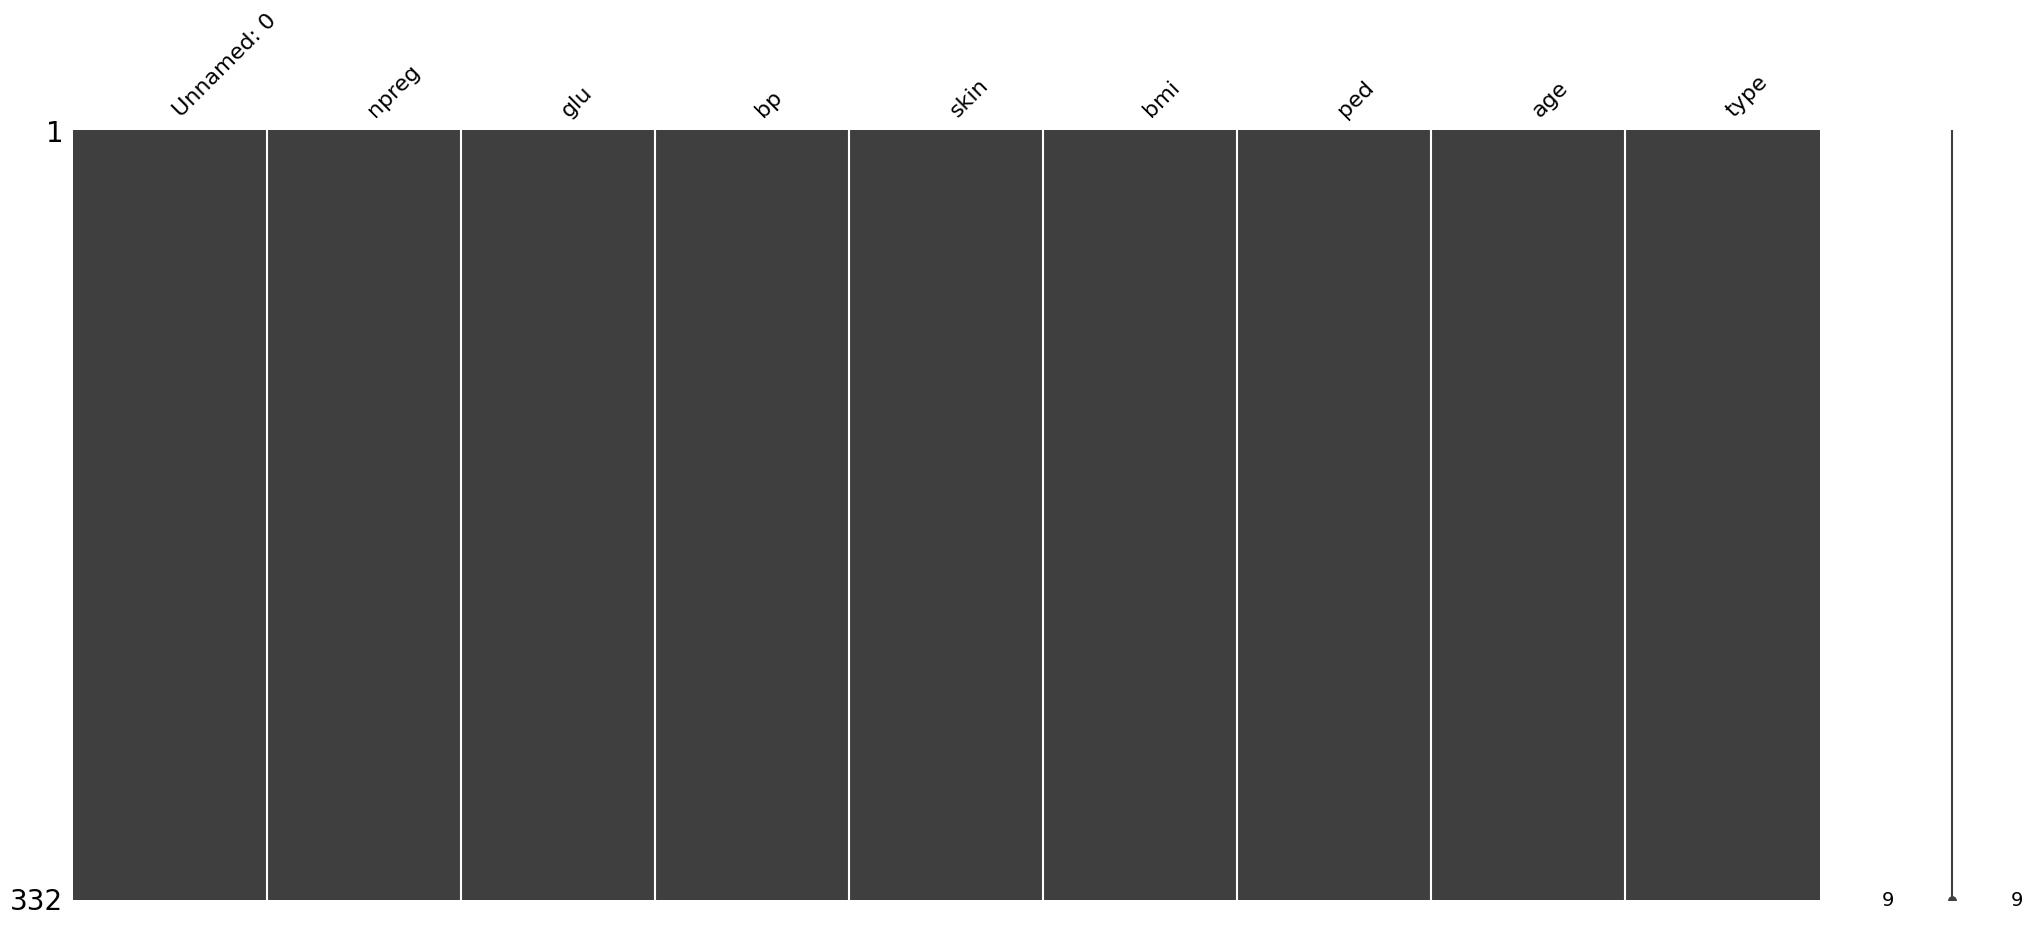

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/mirae/pima.csv')
msno.matrix(df)
plt.show()

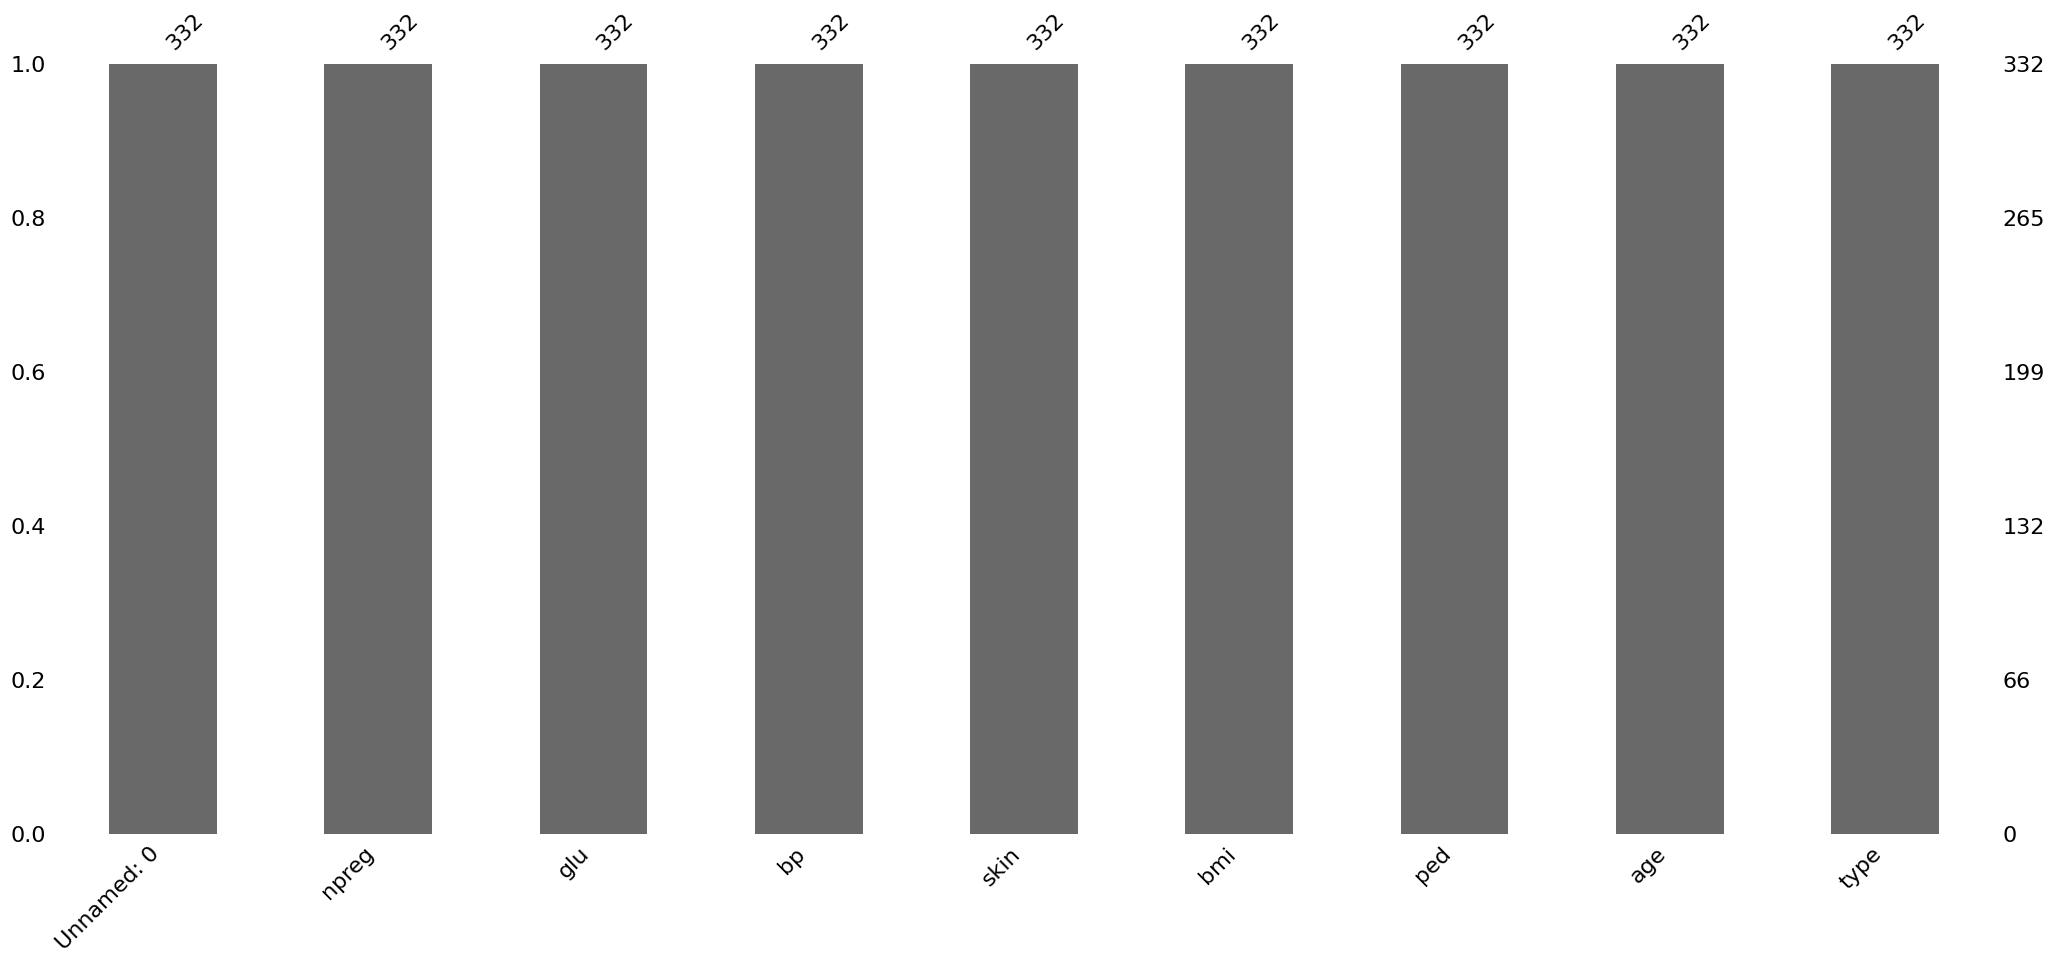

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/mirae/pima.csv',index=False)

In [ ]:
df.dropna().shape #.shape가 없으면 Series나 DataFrame으로 결과값 출력

(332, 9)

In [ ]:
df.describe()

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,166.500000,3.484940,119.259036,71.653614,29.162651,33.239759,0.528389,31.316265
std,95.984374,3.283634,30.501138,12.799307,9.748068,7.282901,0.363278,10.636225
min,1.000000,0.000000,65.000000,24.000000,7.000000,19.400000,0.085000,21.000000
25%,83.750000,1.000000,96.000000,64.000000,22.000000,28.175000,0.266000,23.000000
50%,166.500000,2.000000,112.000000,72.000000,29.000000,32.900000,0.440000,27.000000
75%,249.250000,5.000000,136.250000,80.000000,36.000000,37.200000,0.679250,37.000000
max,332.000000,17.000000,197.000000,110.000000,63.000000,67.100000,2.420000,81.000000


In [ ]:
df.head(5)

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [ ]:
#df[[1,2,3,4,5]]

In [ ]:
#결측치 처리 객체
#데이터 전처리할 때 기본 : 열 제거하면 안됨(변수가 사라져서)
#sklearn : 학습 -> transform
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean') #평균으로 채우는 것을 학습 방법으로 지정해줌
imp.fit([[1,2,3],[np.nan,3,3],[7,6,3]]) #학습
#[1,2,3]
#[np.nan,3,3]
#[7,6,3]

X=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp.transform(X))

[[ 4.          2.          3.        ]
 [ 4.          3.66666667  6.        ]
 [10.          3.66666667  9.        ]]


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
df=pd.DataFrame({'key':[1,1,1,1,1000,1,1,1,1], 'data1':[1,1,1,1,1,1,1,1,2000]})

In [ ]:
z_scores=stats.zscore(df) #z_scores : z점수 정규화 : na가 있으면 0
print(z_scores)
abs_z_scores=np.abs(z_scores) #-inf ~ inf
#이상치 제거(z점수 이상치 제거)
filtered_entries=(abs_z_scores<2).all(axis=1)
new_df=df[filtered_entries]
new_df

        key     data1
0 -0.353553 -0.353553
1 -0.353553 -0.353553
2 -0.353553 -0.353553
3 -0.353553 -0.353553
4  2.828427 -0.353553
5 -0.353553 -0.353553
6 -0.353553 -0.353553
7 -0.353553 -0.353553
8 -0.353553  2.828427


,key,data1
0,1,1
1,1,1
2,1,1
3,1,1
5,1,1
6,1,1
7,1,1


In [ ]:
#사분위수 이상치 제거
df=pd.DataFrame({'Data':np.random.normal(size=200)})
print(df.describe())
#IQR
#상한치 = 3사분위수(quantile(0.75))+1.5*IQR
#하한치 = 1사분위수(quantile(0.25))-1.5*IQR
q_low=df.iloc[:,0].quantile(0.01)
q_hi=df.iloc[:,0].quantile(0.99)
print("하한값",q_low)
print("상한값",q_hi)

df_filtered=df[(df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low)]
print("정상데이터 : ",len(df_filtered))
df_filtered.head()

             Data
count  200.000000
mean     0.053411
std      0.965282
min     -2.560020
25%     -0.648570
50%      0.111529
75%      0.674616
max      2.694329
하한값 -2.0002965550344203
상한값 2.0035825919463472
정상데이터 :  196


,Data
0,-0.153344
1,0.731248
2,-1.159152
3,0.375097
4,0.498618


In [ ]:
#문제
#비정상데이터를 출력하시오
df_filtered2=df[~((df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low))]
print("비정상데이터 : ",len(df_filtered2))

비정상데이터 :  4


In [ ]:
#문제
#정상적으로 IQR을 구하고 상한치와 하한치를 구한 다음 이상치 제거를 하시오
#percentile(75) : 퍼센트로 입력, quantile(0.75) : 소수점으로 입력
q_3=df.iloc[:,0].quantile(0.75)
q_1=df.iloc[:,0].quantile(0.25)
IQR=(q_3 - q_1)

q_hi=df.iloc[:,0].quantile(0.75) +(1.5*IQR)
q_low=df.iloc[:,0].quantile(0.25) -(1.5*IQR)

df_filtered=df[(df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low)]
print("정상 데이터 : ",len(df_filtered))
df_filtered.head()

정상 데이터 :  199


,Data
0,-0.153344
1,0.731248
2,-1.159152
3,0.375097
4,0.498618


* robust 정규화 : (data-median())/IQR
* min-max 정규화 : (data-min)/(max-min)

In [ ]:
(df-df.median())/IQR

,Data
0,-0.200178
1,0.468354
2,-0.960320
3,0.199192
4,0.292543
...,...
195,-0.176056
196,-0.788440
197,-0.752041
198,-1.594849


구간 범주화
* cut
* qcut

In [ ]:
df=pd.DataFrame({'value':np.random.randint(0,100,20)}) #0~100까지 20
print(df.shape)
labels=["{0}-{1}".format(i,i+9) for i in range(0,100,10)]
print(labels)
df['group']=pd.qcut(df.value,10,labels=labels)
df.head(20)

(20, 1)
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']


,value,group
0,97,90-99
1,11,10-19
2,55,30-39
3,70,40-49
4,78,40-49
5,91,70-79
6,89,60-69
7,81,50-59
8,91,70-79
9,18,10-19


In [ ]:
df.groupby("group").count() #집계함수

,value
group,
0-9,2
10-19,2
20-29,2
30-39,2
40-49,3
50-59,2
60-69,1
70-79,3
80-89,1


* figure level(여러개의 화면, 축) vs axes level(단일 화면)
* histplot(디폴트)="hist", kdeplot="kde", ecdfplot
* kind에 따라서 매칭되는 속성이 다를 수 있음

비교, 추세, 구성, 분포 : EDA

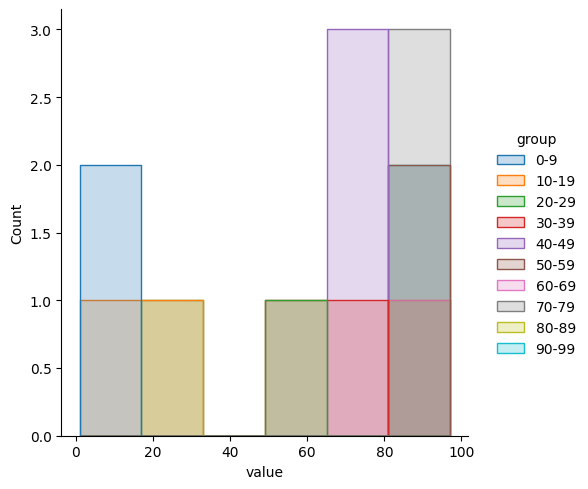

In [ ]:
import seaborn as sns
sns.displot(df,x='value',hue='group',element='step',kind="hist")
#sns.displot(df,x='value',hue='group',kind="kde")
#sns.displot(df,x='value',hue='group',element='step',kind="")

범주화

In [ ]:
s=pd.Series(['a','b','c','a'],dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [ ]:
df=pd.DataFrame({"A":['a','b','c','a'],"C":[10,20,30,40]})
df["B"]=df["A"].astype('category')
df

,A,C,B
0,a,10,a
1,b,20,b
2,c,30,c
3,a,40,a


0.12.2


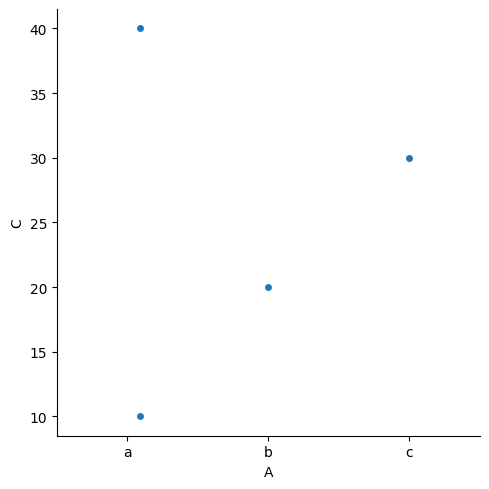

In [ ]:
import matplotlib.pyplot as plt
print(sns.__version__)
sns.catplot(x='A',y='C',data=df)
plt.show()

In [ ]:
values=np.array([1,2,1,np.nan])
codes,uniques=pd.factorize(values) #factorize : 0,1로 데이터 바꿔줌(np.nan가 있을경우 -1로 factor화)
print(codes)
print(uniques) #labels 수

[ 0  1  0 -1]
[1. 2.]


get_dummies: one-hot-encoding에서 사용

long으로 표현되어있는 데이터를 wide하게 출력

In [ ]:
df=pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
print(df)
print("------------/")
#범주형 변수를 정규화(분석)
print(pd.get_dummies(df['key'])) #변수의 종류를 하나의 범주 취급(wide)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
------------/
   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0


In [ ]:
dummies=pd.get_dummies(df['key'],prefix='key')
df_with_dummy=df[['data1']].join(dummies)
print(df_with_dummy)

   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mirae/cust_mast.csv')
df.shape

(5000, 8)

In [ ]:
df.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [ ]:
df_nunique=df.nunique()
df_nunique

customer_id          5000
customer_name        5000
registration_date    4951
email                5000
gender                  2
age                    61
birth                4464
pref                    7
dtype: int64

In [ ]:
df['customer_name'].value_counts()

김서준     1
최서온     1
최규하     1
최상엽     1
최서완     1
       ..
이에스더    1
이하이     1
이린아     1
이보윤     1
정지석     1
Name: customer_name, Length: 5000, dtype: int64

In [ ]:
df['pref'].value_counts(normalize=True)*100

인천광역시    22.10
대전광역시    19.34
서울특별시    18.54
부산광역시    14.38
대구광역시    10.44
울산광역시     7.64
광주광역시     7.56
Name: pref, dtype: float64

In [ ]:
#범주형을 고려
pd.crosstab(df['pref'],df['gender'])

gender,F,M
pref,,
광주광역시,208,170
대구광역시,250,272
대전광역시,465,502
부산광역시,347,372
서울특별시,474,453
울산광역시,185,197
인천광역시,556,549


<Axes: xlabel='gender', ylabel='count'>

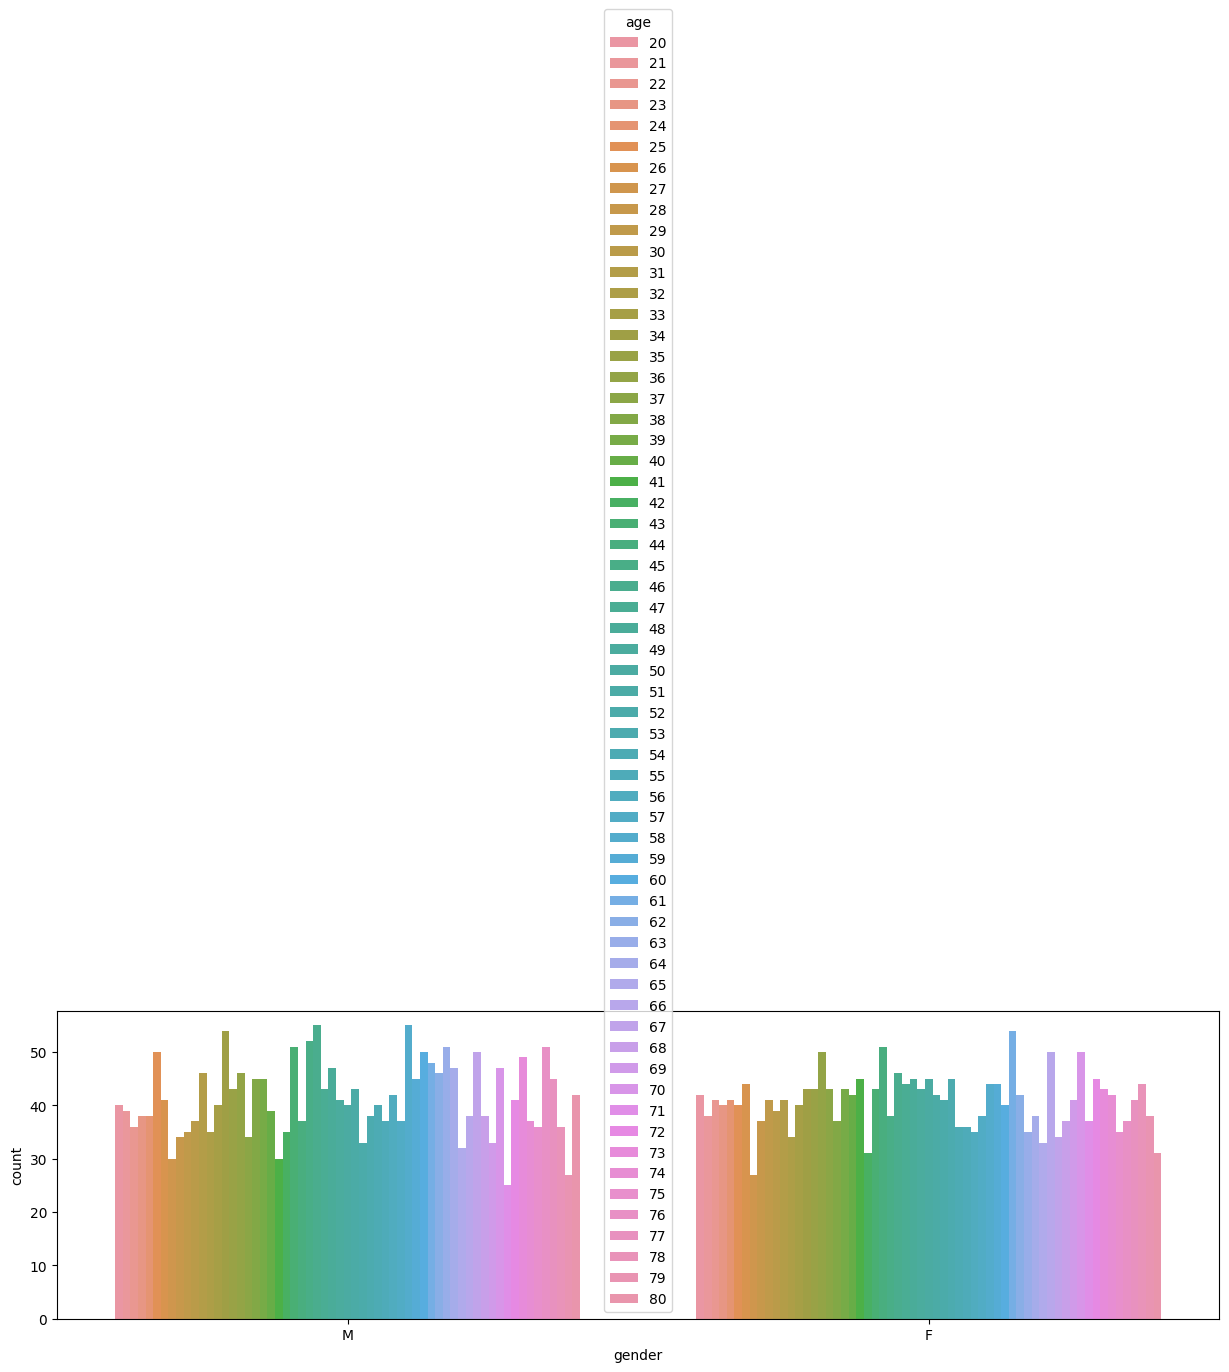

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="gender",hue="age")

In [ ]:
#pref로 groupby하고 age의 평균 값 구하기
df.groupby('pref')['age'].mean()

pref
광주광역시    48.941799
대구광역시    50.166667
대전광역시    49.806618
부산광역시    49.394993
서울특별시    50.396980
울산광역시    51.437173
인천광역시    50.257014
Name: age, dtype: float64

<Axes: xlabel='pref', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*

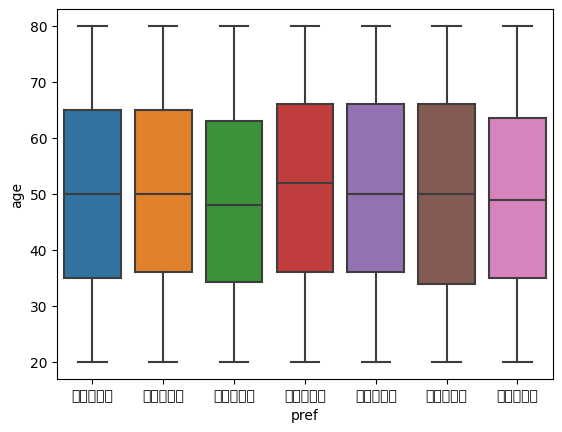

In [ ]:
sns.boxplot(data=df,x='pref',y='age')

문자열 처리

In [4]:
#대문자
text_tesst=pd.Series(['sky','blue','earth','happy'])
text_tesst.str.upper() #lower()

0      SKY
1     BLUE
2    EARTH
3    HAPPY
dtype: object

In [ ]:
#문자 길이
text_tesst.str.len()

0    3
1    4
2    5
3    5
dtype: int64

In [ ]:
#e로 시작하는지
text_tesst.str.startswith('e')

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
#a를 기준으로 자르기(a는 없어)
text_tesst.str.split('a') #리스트로 표현

0       [sky]
1      [blue]
2    [e, rth]
3    [h, ppy]
dtype: object

정규표현식(regular expression,rgex) : 어떤 언어에서든 사용법 동일

In [5]:
#대괄호는 선택, +는 반복
text_tesst.str.extract('([A-Da-d])',expand=False) #extract : 추출 #expand : True(데이터 프레임으로 출력) / False(시리즈로 출력)

0    NaN
1      b
2      a
3      a
dtype: object

In [17]:
text_tesst.str.extract('([A-Fa-h]+)',expand=False)

0    NaN
1      b
2     ea
3     ha
dtype: object

In [ ]:
text_tesst=text_tesst.str.upper()
text_tesst.str.findall(r'^[^AEIOUS].*[^aeiou}$]') #^ : 선두, $ : 끝 #대괄호 안에서의 ^ : 제외하

0         []
1     [BLUE]
2         []
3    [HAPPY]
dtype: object

In [ ]:
text_tesst=text_tesst.str.lower()
text_tesst.str[0:3]

0    sky
1    blu
2    ear
3    hap
dtype: object

In [ ]:
import re #pythone core에서 사용하는 정규표현식
text="문의사항이 있으면 032-232-3245으로 연락주시기 바랍니다. 123-222-2222"
#d : digit {}:횟수
#d와 정규표현식의 d(\)를 구분하기 위해서
regex=re.compile(r'(\d{3})-(\d{3}-\d{4})') #패턴생성
matchobj=regex.search(text)
print(matchobj) #고유 포멧
phonenumber=matchobj.group()
print(phonenumber)

<re.Match object; span=(10, 22), match='032-232-3245'>
032-232-3245


In [ ]:
matchobj=regex.findall(text)
print(matchobj)

[('032', '232-3245'), ('123', '222-2222')]


In [ ]:
#문제
#나누어진 번호를 '032-232-3245'형태로 출력하시오
pd.Series(matchobj).map(lambda x:'-'.join(x))

0    032-232-3245
1    123-222-2222
dtype: object

In [ ]:
s=pd.Series(["대한_민국_만세"])
s.str.split("_")

0    [대한, 민국, 만세]
dtype: object

In [ ]:
text="foo   bar\t baz \ttqus"
regex=re.compile(r'\s+') #string #S : 문자가 아닌것
print("데이터 검색 : ",regex.findall(text))
print("데이터 분할 : ",regex.split(text))

데이터 검색 :  ['   ', '\t ', ' \t']
데이터 분할 :  ['foo', 'bar', 'baz', 'tqus']


In [ ]:
s=pd.Series(["대한_민국_만세"])
s.str.replace("_"," ")

0    대한 민국 만세
dtype: object

In [ ]:
a=s.to_numpy()
type(a)
a

array(['대한_민국_만세'], dtype=object)

In [ ]:
data={'Dave':'ghd832@naver.com','Steve':'steve@gmail.com','Rob':'rob','Wes':np.nan}
#정상 메일만 추출
data=pd.Series(data)
print(data)

Dave     ghd832@naver.com
Steve     steve@gmail.com
Rob                   rob
Wes                   NaN
dtype: object


In [ ]:
pattern=r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]'
matches=data.str.match(pattern, flags=re.IGNORECASE)
print("match 결과\n",matches)

match 결과
 Dave      True
Steve     True
Rob      False
Wes        NaN
dtype: object


In [ ]:
matches=data.str.findall(pattern,flags=re.IGNORECASE)
print("findall의 결과\n",matches)

findall의 결과
 Dave     [ghd832@naver.c]
Steve     [steve@gmail.c]
Rob                    []
Wes                   NaN
dtype: object


In [ ]:
matches=data.str.extractall('([a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z])',flags=re.IGNORECASE)
print("extract 결과\n",matches)

extract 결과
                           0
      match                
Dave  0      ghd832@naver.c
Steve 0       steve@gmail.c


In [ ]:
#문제
#칼럼 이름의 공백을 제거하시오 (strip)
#모두 소문자로 변환하시오 (lower)
#문자열 사이의 공백은 _로 대체(replace)
df=pd.DataFrame(np.random.randn(3,2), columns=[' Columns A ',' Columns B '],index=range(3))
df.axes

df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")
df

,columns_a,columns_b
0,-0.904733,-0.167540
1,-0.678522,2.206546
2,-0.588037,1.684540


In [ ]:
df['columns_a']

0   -0.904733
1   -0.678522
2   -0.588037
Name: columns_a, dtype: float64

In [ ]:
#년도를 비교한 결과를 newcol이라고 하는 필드에 추가하시오
sqldate=pd.Series(["2014-0-1","2015-10-10","1990-23-2"])
pdf=pd.Series(["2014.pdf","2015.pdf","1999.pdf"])
df=pd.DataFrame({"sqldate":sqldate,"pdf":pdf})

df['newcol']=df['sqldate'].str[0:4]==df['pdf'].str[0:4]
df

,sqldate,pdf,newcol
0,2014-0-1,2014.pdf,True
1,2015-10-10,2015.pdf,True
2,1990-23-2,1999.pdf,False


In [ ]:
df['newcol']=df['sqldate'].str.slice(0,4)==df['pdf'].str.slice(0,4)

In [ ]:
#문제
#글자를 카운트해서 length필드에 추가하시오
import pandas as pd
df=pd.DataFrame({'text':['한글','미국','일본?']})
df['length']=df['text'].str.len()
df

,text,length
0,한글,2
1,미국,2
2,일본?,3


In [ ]:
df['length2']=df['text'].map(len)
df

,text,length,length2
0,한글,2,2
1,미국,2,2
2,일본?,3,3


pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)




In [ ]:
#ages 데이터를 bins를 구간으로해서 구간범주화 하시오
#도수분포표를 작성하시오
ages=[20,22,25,27,21,24,37,31,61,45,41,32]
bins=[18,25,35,60,100]

cats=pd.cut(ages,bins)
print("범주화한 데이터 : ",cats) #레이블은 자동 : 구간값
print("-------------------/")
print("code : ",cats.codes) #구간 값 번호
print("-------------------/")
print("범주의 종류는",cats.categories)
print("-------------------/")
print("범주별로 카운트 한 결과\n",cats.value_counts())

범주화한 데이터 :  [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
-------------------/
code :  [0 0 0 1 0 0 2 1 3 2 2 1]
-------------------/
범주의 종류는 IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')
-------------------/
범주별로 카운트 한 결과
 (18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


In [ ]:
#한글화
!apt-get update -qq #update : 패키지를 새로운 버전 / upgrade : 같은 패키지 버전
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe=fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #패밀리 이름(글꼴 사이즈별로 존재)
fm.fontManager.ttflist.insert(0,fe)
#rc(resource configuration)
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


상태 기반(plt) / 무상태 기반(figure, axes)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


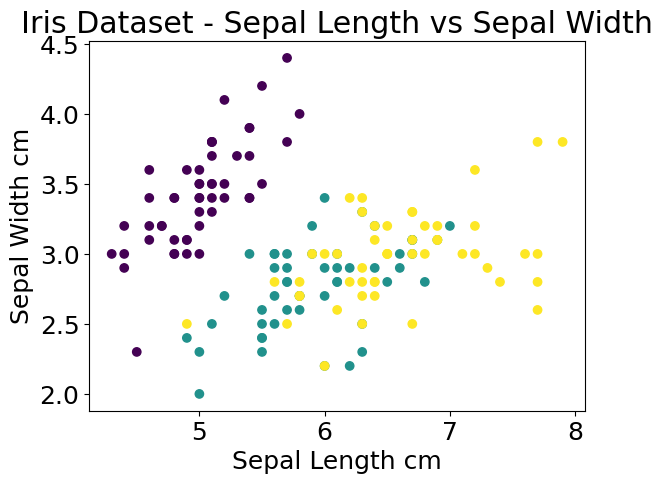

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['target']=iris.target
iris_df['species']=iris_df['target'].map({i:species for i, species in enumerate(iris.target_names)})
print(iris_df.head())
#2개의 축
#1개만 주는 경우 : count(y축이 카운트)
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris_df['target']) #c=color
plt.xlabel('Sepal Length cm')#축 제목
plt.ylabel('Sepal Width cm')
plt.title('Iris Dataset - Sepal Length vs Sepal Width') #
plt.show()

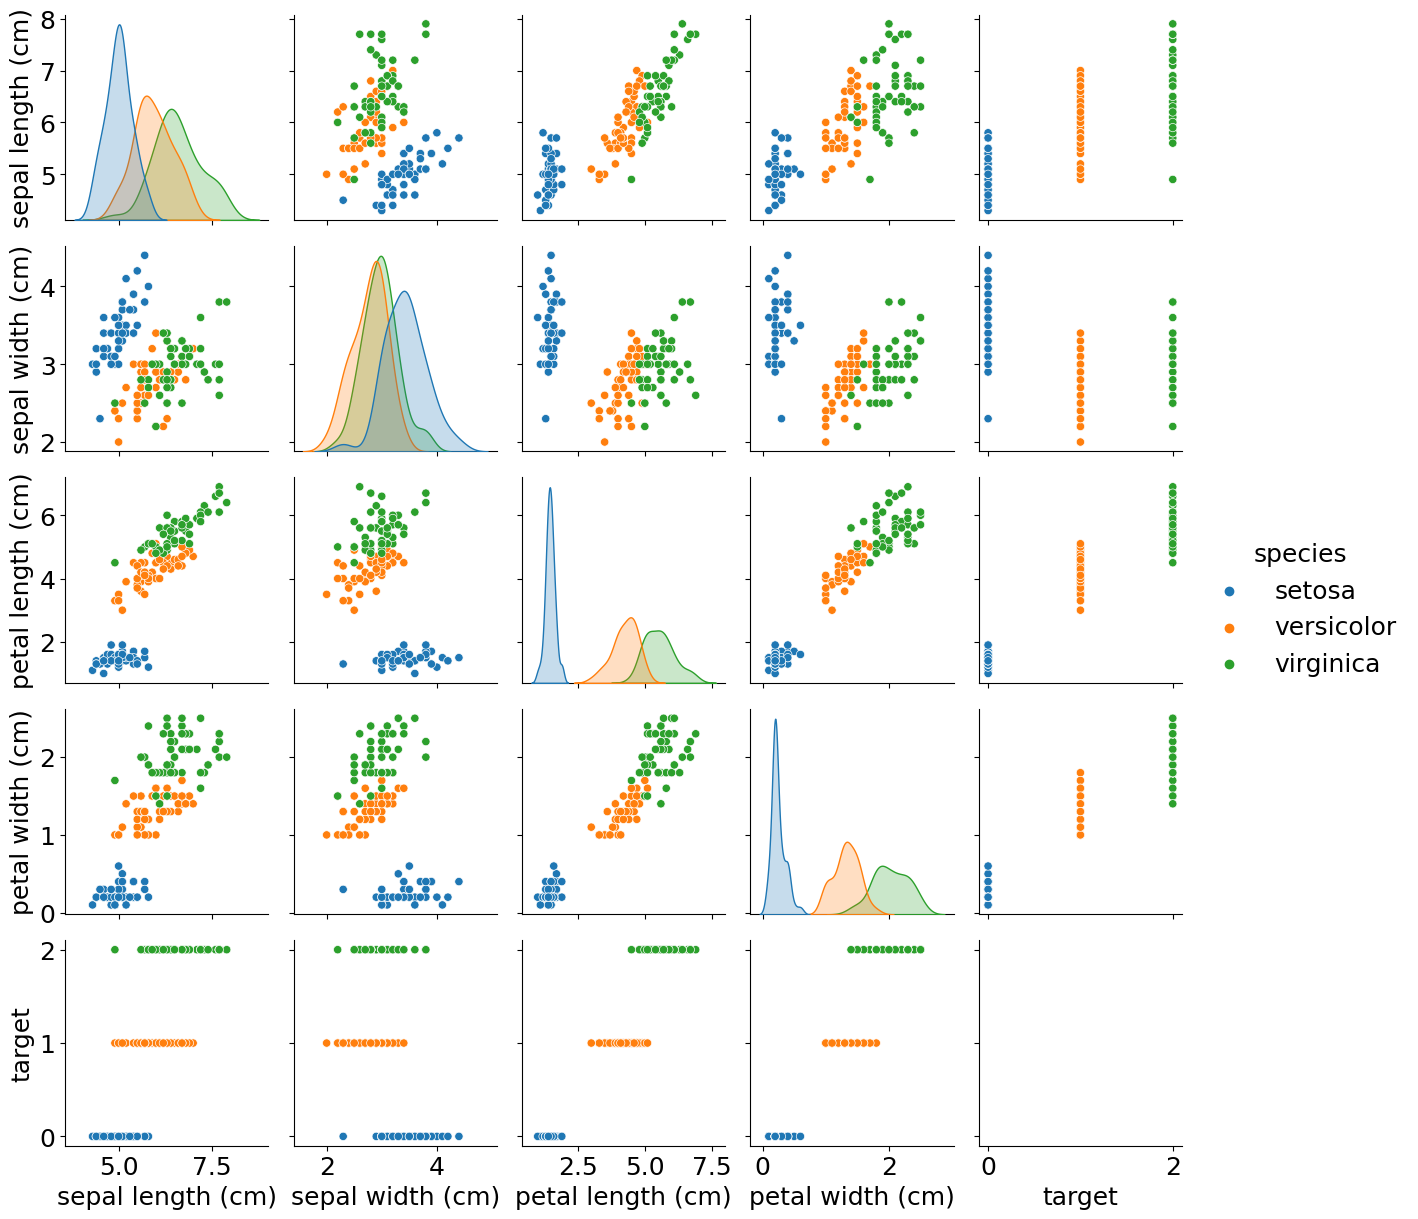

In [ ]:
sns.pairplot(iris_df,hue='species')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(iris_df,x='sepal length (cm)',y='sepal width (cm)',color='species')
fig.show()

In [ ]:
pd.options.plotting.backend="plotyl"

In [ ]:
pd.options.plotting.backend="matplotlib"

<function matplotlib.pyplot.show(close=None, block=None)>

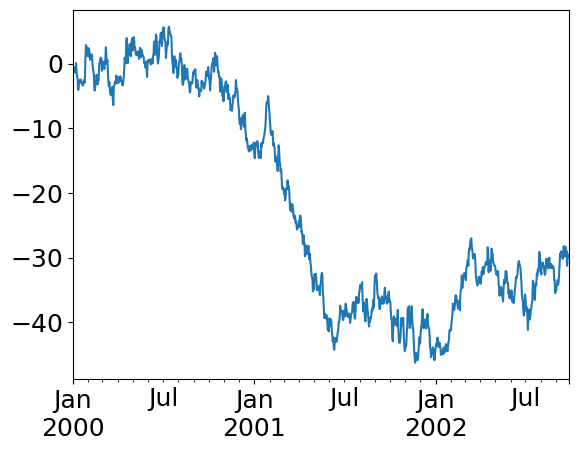

In [ ]:
#to_datetime



ts=pd.Series(np.random.randn(1000),index=pd.date_range("1/1/2000",periods=1000)) #normal, 정규분포
ts=ts.cumsum() #cumsum : 이동평균선(5,10,15,)
ts.plot() #ts.plot(kind-setLi)
plt.show

<Axes: >

<Figure size 640x480 with 0 Axes>

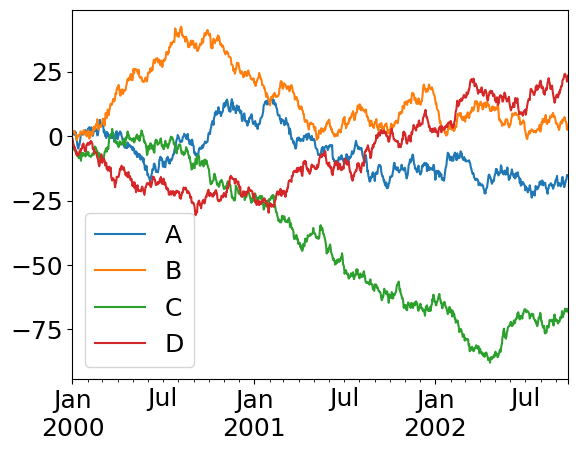

In [ ]:
#4개의 열
#index 참조
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index, columns=list('ABCD'))
df=df.cumsum()
plt.figure()
df.plot()

<Axes: >

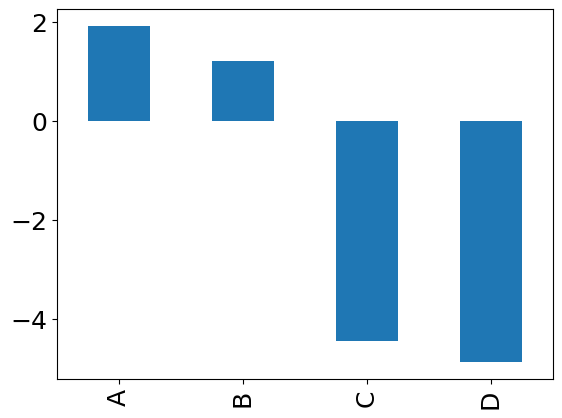

In [ ]:
plt.figure()
df.iloc[5].plot(kind='bar')

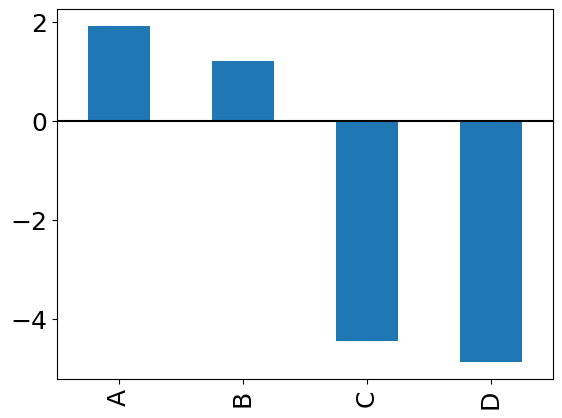

In [ ]:
plt.figure()
df.iloc[5].plot.bar()
plt.axhline(0,color='k') #horizental line(수평선)

<Axes: >

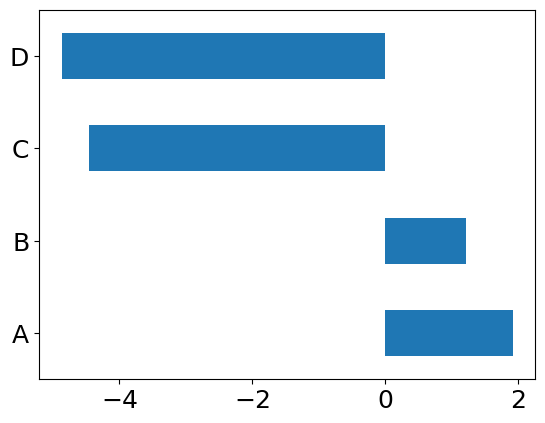

In [ ]:
df.iloc[5].plot.barh(stacked=True)

<Axes: >

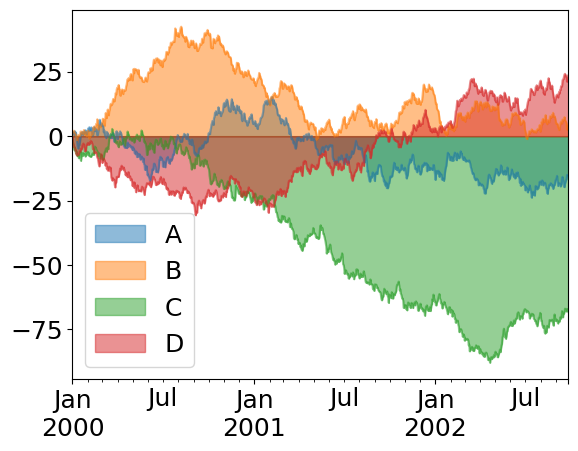

In [ ]:
df.plot.area(stacked=False)

무상태 기반

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.



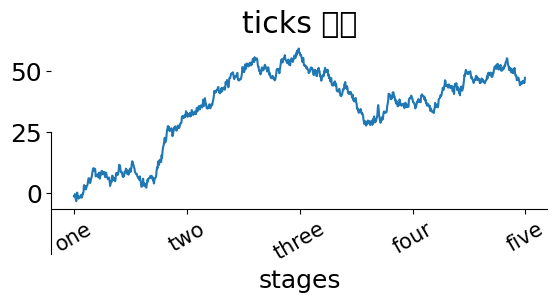

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(2,1,1) #화면분할 (행, 열, 번호)
ax.plot(np.random.randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30, fontsize='small')
ax.spines['left'].set_bounds(-25,25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('ticks 변경')
ax.set_xlabel('stages')
plt.show()

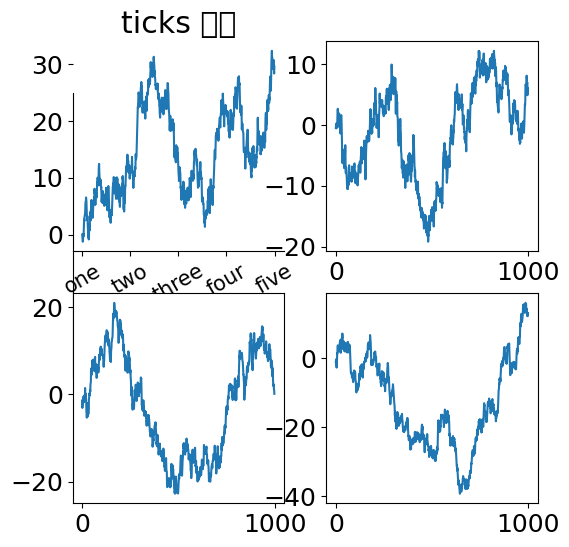

In [ ]:
fig=plt.figure(figsize=[6,6])
ax=fig.add_subplot(2,2,1) #화면분할 (행, 열, 번호) #좌상
ax2=fig.add_subplot(2,2,2) #우상
ax3=fig.add_subplot(2,2,3) #좌하
ax4=fig.add_subplot(2,2,4) #우하
ax.plot(np.random.randn(1000).cumsum())
ax2.plot(np.random.randn(1000).cumsum())
ax3.plot(np.random.randn(1000).cumsum())
ax4.plot(np.random.randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30, fontsize='small')
ax.spines['left'].set_bounds(-25,25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('ticks 변경')
ax.set_xlabel('stages')
plt.show()

In [ ]:
from scipy.integrate import quad
def func(x):
  return (x-4)*(x-6)*(x-5) + 100
a=2 #구간 값
b=9
integral,error = quad(func,a,b) #구간 적분 : 740.2500000000001
integral

740.2500000000001

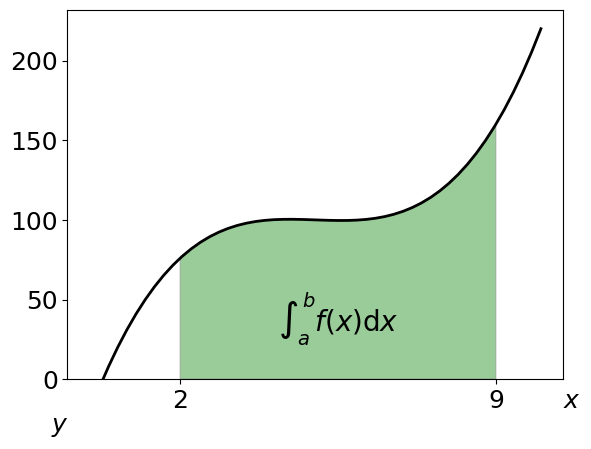

In [ ]:
from seaborn._core.properties import HorizontalAlignment
from matplotlib.patches import Polygon
def func(x): #3차 방정식 -> 면적 적분
  return (x-4)*(x-6)*(x-5) + 100
a,b=2,9
x=np.linspace(0,10)
y=func(x)
fig,ax=plt.subplots()
ax.plot(x,y,"k",linewidth=2)
ax.set_ylim(bottom=0)
ix=np.linspace(a,b)
iy=func(ix)
verts=[(a,0),*zip(ix,iy),(b,0)]
#polygon : 폐다각형 그리기
poly=Polygon(verts, facecolor='green',edgecolor='0.5',alpha=0.4)
ax.add_patch(poly)
#Tex 마크업 언어 : $와 $ 사이에 수학적 언어를 사용해야함
#특별한 의미(\) : 적분(integeral),
ax.text(0.5*(a+b),30,r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center', fontsize=20)
fig.text(0.9,0.05,'$x$')
fig.text(0.1,0.0,'$y$')
ax.set_xticks((a,b))
plt.show()

Text(0, 0.5, 'f(x)')

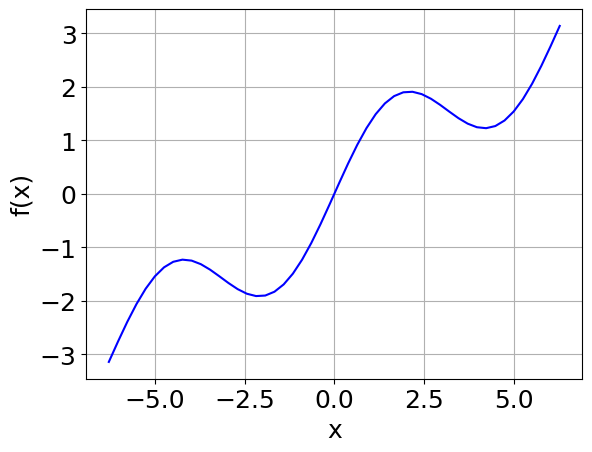

In [ ]:
#함성함수
def f(x):
  return np.sin(x) + 0.5*x
x=np.linspace(-2*np.pi,2*np.pi,50) #
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

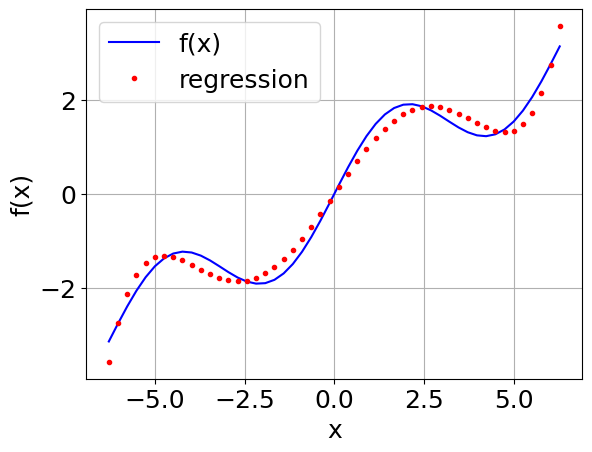

In [ ]:
reg=np.polyfit(x,f(x),deg=5)
ry=np.polyval(reg,x)
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

데이터 개수 (100, 100), X의 요소10000


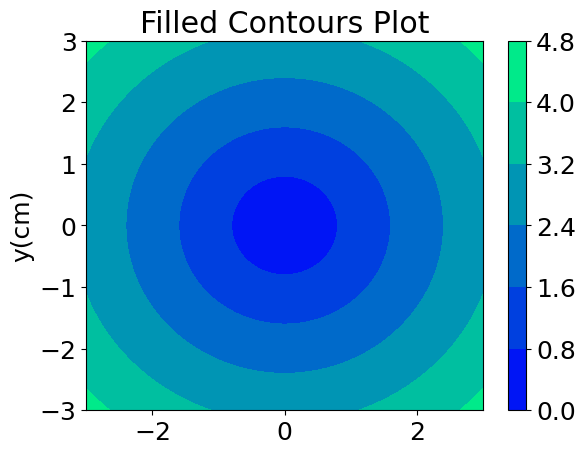

In [ ]:
#mesh와 등고
xlist=np.linspace(-3.0,3.0,100)
ylist=np.linspace(-3.0,3.0,100)
X,Y=np.meshgrid(xlist,ylist)
print(f"데이터 개수 {len(X), len(Y)}, X의 요소{X.size}")
Z=np.sqrt(X**2+Y**2)
fig,ax=plt.subplots(1,1)
#fill 채워라
cp=ax.contourf(X,Y,Z,levels=5,cmap='winter')
fig.colorbar(cp) #거리값을 color로 표
ax.set_title('Filled Contours Plot')
ax.set_ylabel('y(cm)')
plt.show()

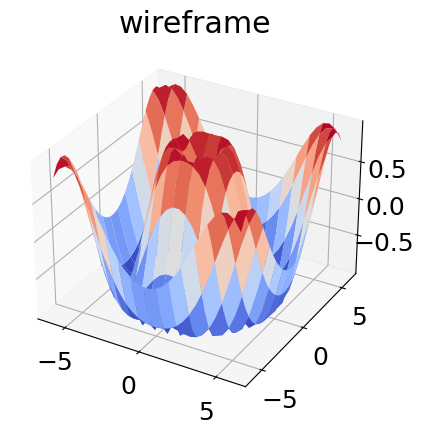

In [ ]:
import matplotlib as mpl #cmap을 가지고 있는 패키
def f(x,y): #거리값이 원형으로 똑같음
  return np.sin(np.sqrt(x**2+y**2)) #거리값을 sin파의 값으로 줌

x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y=np.meshgrid(x,y) #900
Z=f(X,Y)

fig=plt.figure
ax=plt.axes(projection='3d') #도화지를 바로 얻
#ax.plot_wireframe(X,Y,Z,color='black')
#rstride 빠르게 진행하기 위해
#화면 좌표
#1024x1024 사각형점
ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True) #antialiased : 굴곡 (단점 : 속도가 느려짐)
ax.set_title('wireframe')
plt.show()